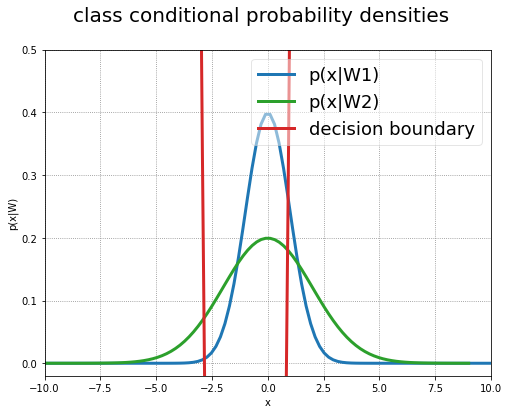

In [40]:
%matplotlib inline
# This is a demo for Bayesian classification with Gaussian distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon
from pdb import set_trace as st

theta1 = [0, 1]
theta2 = [1, 2]
P = [0.5, 0.5] 
x = np.linspace(-10, 10, 100)
x1 = norm.pdf(x+theta1[0], theta1[0], theta1[1])  
x2 = norm.pdf(x-theta1[0], theta2[0], theta2[1]) 
# calculate the dicision boundary y value for each element of the x vector
x_boundary = x**2 + 2*x -2.386294

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('class conditional probability densities', fontsize=20)
plt.grid(which='both',axis='both', color='grey',linestyle=':')
plt.plot(x+theta1[0], x1, label='p(x|W1)', color='tab:blue', linewidth=3)
plt.plot(x-theta2[0], x2, label='p(x|W2)', color='tab:green', linewidth=3)
ax.plot(x, x_boundary, label='decision boundary', color='tab:red', linewidth=3)

plt.xlim([-10, 10])
plt.ylim([-0.02, .50])

plt.xlabel("x")
plt.ylabel("p(x|W)")

plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()
fig.savefig('classconditionalpdf.jpg')



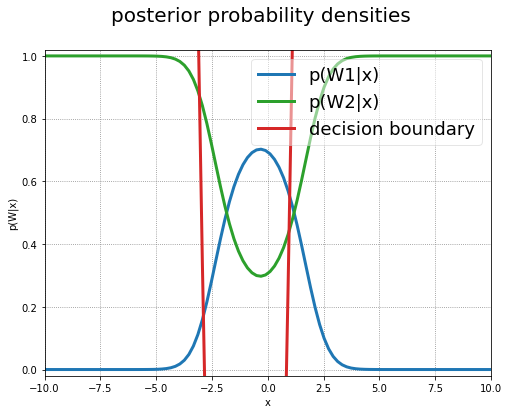

In [39]:
x1post = np.zeros(x.shape)
x1post = np.zeros(x.shape)
x1post=x1*P[0]/(x1*P[0]+x2*P[1])
x2post=x2*P[1]/(x1*P[0]+x2*P[1])

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('posterior probability densities', fontsize=20)
plt.grid(which='both',axis='both', color='grey',linestyle=':')
plt.plot(x, x1post, label='p(W1|x)', color='tab:blue', linewidth=3)
plt.plot(x, x2post, label='p(W2|x)', color='tab:green', linewidth=3)
ax.plot(x, x_boundary, label='decision boundary', color='tab:red', linewidth=3)

plt.xlim([-10, 10])
plt.ylim([-0.02, 1.02])

plt.xlabel("x")
plt.ylabel("p(W|x)")

plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()
fig.savefig('postprobabilities.jpg')


In [15]:
# Build a training dataset

#First sample the labels
P = [0.5, 0.5] 
N = 50
ind = np.random.uniform(0,1,N)
y = np.zeros(ind.shape)
y[ind>P[0]]=1
print(y.sum())



25.0
[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0.]


In [3]:
x = np.zeros(ind.shape)
x[y==0] = np.random.normal(theta1[0], theta1[1], len(x[y==0]))
x[y==1] = np.random.normal(theta2[0], theta2[1], len(x[y==1]))
#print(x)

In [4]:
def pred_score(x,theta,p):
    return np.log(norm.pdf(x, theta[0],theta[1])) + np.log(p)
y1 = pred_score(x, theta1, P[0])
y2 = pred_score(x, theta2, P[1])
#print(np.array([y1, y2]))
y_hat = np.argmax(np.array([y1,y2]),axis=0)
print(y_hat)
print('Accuracy is # of correct predictions/N, training acc={:.3f}'.format((y==y_hat).sum()/N))

[0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1]
Accuracy is # of correct predictions/N, training acc=0.980


In [5]:
# MLE estimation
# assume that stds are known
mu1 = x[y==0].sum() / (y==0).sum()
mu2 = x[y==1].sum() / (y==1).sum()
y1 = pred_score(x, [mu1, theta1[1]], 0.5)
y2 = pred_score(x, [mu2, theta2[1]], 0.5)
y_hat = np.argmax(np.array([y1,y2]),axis=0)
print([mu1, mu2])
print(theta1[0], theta1[1])
print('MLE: training acc={:.3f}'.format((y==y_hat).sum()/N))

[-2.0231511604884775, 2.0058116704272964]
-3 2
MLE: training acc=0.940


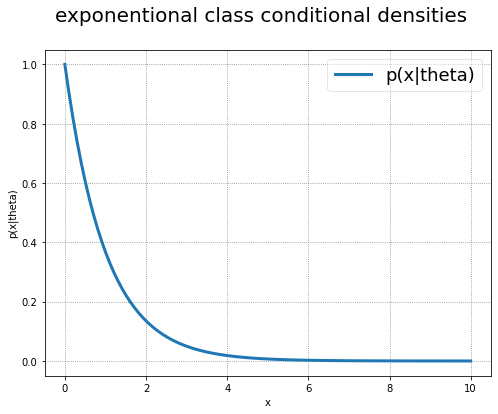

In [59]:
x = np.linspace(0, 10, 100)
theta=1
xexp1 = expon.pdf(x,loc=0, scale=1/theta)
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('exponentional class conditional densities', fontsize=20)
plt.grid(which='both',axis='both', color='grey',linestyle=':')
plt.plot(x, xexp1, label='p(x|theta)', color='tab:blue', linewidth=3)

plt.xlabel("x")
plt.ylabel("p(x|theta)")

plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()
fig.savefig('expclassconditionalpdf1.jpg')


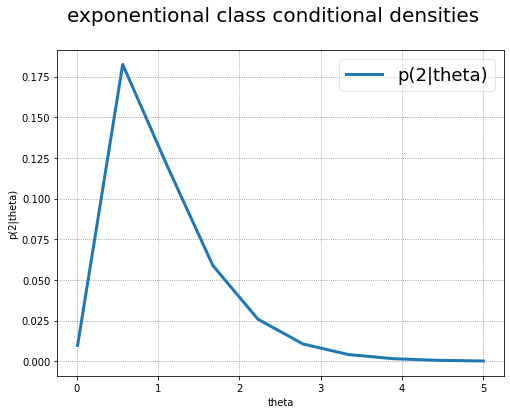

In [60]:
theta= np.linspace(0.01, 5, 10)
x=2
xexp2 = expon.pdf(x,loc=0, scale=1/theta)
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('exponentional class conditional densities', fontsize=20)
plt.grid(which='both',axis='both', color='grey',linestyle=':')
plt.plot(theta, xexp2, label='p(2|theta)', color='tab:blue', linewidth=3)

plt.xlabel("theta")
plt.ylabel("p(2|theta)")

plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()
fig.savefig('expclassconditionalpdf2.jpg')



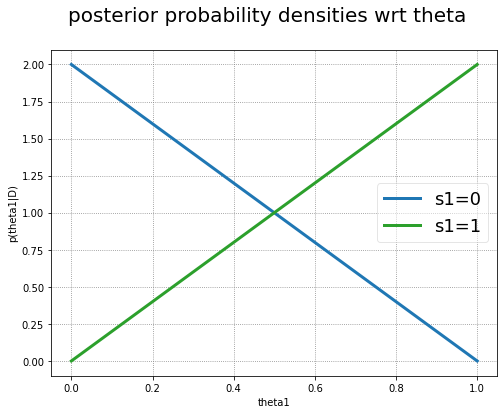

In [63]:
import math 
theta1= np.linspace(0, 1, 100)
post1=2*(1-theta1)
post2=2*theta1

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('posterior probability densities wrt theta', fontsize=20)
plt.grid(which='both',axis='both', color='grey',linestyle=':')
plt.plot(theta1, post1, label='s1=0', color='tab:blue', linewidth=3)
plt.plot(theta1, post2, label='s1=1', color='tab:green', linewidth=3)

plt.xlabel("theta1")
plt.ylabel("p(theta1|D)")

plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()
fig.savefig('posteriorpdfQ6.jpg')
